In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from IPython.display import clear_output
import matplotlib.animation as animation

(0.0, 10.0)

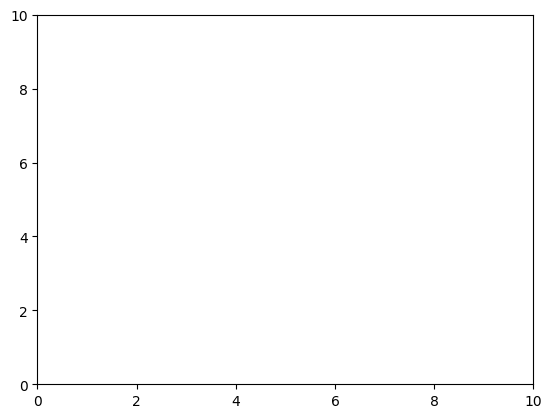

In [2]:
from matplotlib.animation import FFMpegWriter
metadata = dict(title='My first animation in 2D', artist='Matplotlib',comment='Wakanda is coming.')
writer = FFMpegWriter(fps=15, metadata=metadata)
fig = plt.figure()
plt.xlim(0, 10)
plt.ylim(0, 10)

In [3]:
def generate_soil_moisture(rows, cols):
    soil_moisture_values = [0.1, 0.5, 0.7]
    moisture_values = np.random.choice(soil_moisture_values, size=(rows, cols))
    return moisture_values

def get_soil_color(moisture):
    if moisture == 0.7:
        return '#732C1D'
    elif moisture == 0.5:
        return '#AA622A'
    else:
        return '#DC8D37'

def plot_soil_grid(ax, moisture_grid):
    ax.cla()
    ax.axis('off')
    soil_color_grid = [[get_soil_color(moisture) for moisture in row] for row in moisture_grid]
    ax.imshow([[to_rgba(color) for color in row] for row in soil_color_grid])
    plt.show()
    plt.pause(0.05)

In [4]:
# Define the size of the grid
rows = 50
cols = 50

# Initialize a grid with soil moisture values
soil_moisture_grid = generate_soil_moisture(rows, cols)

In [5]:
def get_adjusted_moisture(moisture_grid, r, c):
    neighbors = [(r-1, c), (r+1, c), (r, c-1), (r, c+1)]
    valid_neighbors = [(x, y) for x, y in neighbors if 0 <= x < moisture_grid.shape[0] and 0 <= y < moisture_grid.shape[1]]
    
    average_moisture = sum([moisture_grid[coord[0], coord[1]] for coord in valid_neighbors])/len(valid_neighbors)
    
    if average_moisture <= 0.35:
        return 0.1
    elif average_moisture <= 0.5:
        return 0.5
    return 0.7

def adjust_soil_map(moisture_grid):
    boundaries = [0, moisture_grid.shape[0]//5, 2* moisture_grid.shape[0]//5, 3*moisture_grid.shape[0]//5, 4*moisture_grid.shape[0]//5, moisture_grid.shape[0] - 1]
    for i in range(len(boundaries) - 1):
        for j in range(len(boundaries) - 1):
            random_r = np.random.randint(boundaries[i], boundaries[i + 1])
            random_c =  np.random.randint(boundaries[j], boundaries[j + 1])
            moisture_grid[random_r, random_c] = get_adjusted_moisture(moisture_grid, random_r, random_c)
    return moisture_grid

In [6]:
# Adjust soil colors so that the plot resembles an actual terrain where soil with the same moisture levels
# are place next to each other

for _ in range(500):
    soil_moisture_grid = adjust_soil_map(soil_moisture_grid)

In [7]:
class Flower:
    def __init__(self, soil_moisture_requirement, competition, life_span, age, hexcode, soil_residence=None):
        self.soil_moisture_requirement = soil_moisture_requirement
        self.competition = competition
        self.life_span = life_span
        self.age = age
        self.hexcode = hexcode
        self.soil_residence = soil_residence

    def set_soil_residence(self, soil_residence):
        self.soil_residence = soil_residence
    
    def reproduce(self, r, c, flower_grid, moisture_grid):
        neighbors = [(r-1, c), (r+1, c), (r, c-1), (r, c+1)]
        valid_neighbors = [(x, y) for x, y in neighbors if 0 <= x < moisture_grid.shape[0] and 0 <= y < moisture_grid.shape[1]]
        for neighbor in valid_neighbors:
            if flower_grid[neighbor] != None and flower_grid[neighbor].competition < self.competition and flower_grid[neighbor].soil_residence >= self.soil_moisture_requirement: 
                flower_grid[neighbor] = Flower(self.soil_moisture_requirement, self.competition, self.life_span, 0, self.hexcode, flower_grid[neighbor].soil_residence)
                moisture_grid[neighbor] = 0
            elif flower_grid[neighbor] == None and moisture_grid[neighbor] >= self.soil_moisture_requirement:
                flower_grid[neighbor] = Flower(self.soil_moisture_requirement, self.competition, self.life_span, 0, self.hexcode, moisture_grid[neighbor])
                moisture_grid[neighbor] = 0
    def update_age(self):
        self.age += 1

In [8]:
def get_flower(label):
    if label == 0: #purple/pink
        return Flower(0.1, random_competition_levels[0], np.random.randint(20, 35), 0, '#C60CB7')
    if label == 1: #rose pink
        return Flower(0.3, random_competition_levels[1], np.random.randint(36, 50), 0, '#C60C65')
    if label == 2: #green
        return Flower(0.5, random_competition_levels[2], np.random.randint(51, 65), 0, '#4F6F0F')
    return Flower(0.7, random_competition_levels[3], np.random.randint(66, 80), 0, '#9E28F2') #violet

In [9]:
# Need to create a method to get the cell color to account for the newly added flowers on the grid
def get_cell_color(moisture_grid, flower_grid, r, c):
    if moisture_grid[r, c] == 0.7:
        return '#732C1D'
    elif moisture_grid[r, c] == 0.5:
        return '#AA622A'
    elif moisture_grid[r, c] == 0.1:
        return '#DC8D37'
    else:
        return flower_grid[r, c].hexcode

In [10]:
def plot_plant_grid(ax, moisture_grid, flower_grid):
    ax.cla()
    ax.axis('off')
    soil_color_grid = [[get_cell_color(moisture_grid, flower_grid, r, c) for c in range(moisture_grid.shape[0])] for r in range(moisture_grid.shape[1])]
    ax.imshow([[to_rgba(color) for color in row] for row in soil_color_grid])
    plt.show()
    plt.pause(0.05)

In [11]:
def plant_initial_flowers(moisture_grid, flower_grid):
    for r in range(moisture_grid.shape[0]):
        for c in range(moisture_grid.shape[1]):
            if flower_grid[r, c].soil_moisture_requirement <= moisture_grid[r, c]:
                flower_grid[r, c].set_soil_residence(moisture_grid[r, c])
                moisture_grid[r, c] = 0
            else:
                flower_grid[r, c] = None

In [12]:
def reproduction_cycle(moisture_grid, flower_grid):
    boundaries = [0, moisture_grid.shape[0]//5, 2* moisture_grid.shape[0]//5, 3*moisture_grid.shape[0]//5, 4*moisture_grid.shape[0]//5, moisture_grid.shape[0] - 1]
    for i in range(len(boundaries) - 1):
        for j in range(len(boundaries) - 1):
            random_r = np.random.randint(boundaries[i], boundaries[i + 1])
            random_c =  np.random.randint(boundaries[j], boundaries[j + 1])
            if flower_grid[random_r, random_c] != None:
                flower_grid[random_r, random_c].reproduce(random_r, random_c, flower_grid, moisture_grid)

In [13]:
def aging_cycle(moisture_grid, flower_grid):
    for r in range(flower_grid.shape[0]):
        for c in range(flower_grid.shape[1]):
            if flower_grid[r, c] != None:
                flower_grid[r, c].update_age()
                if flower_grid[r, c].age > flower_grid[r, c].life_span:
                    moisture_grid[r, c] = flower_grid[r, c].soil_residence
                    flower_grid[r, c] = None

In [14]:
random_competition_levels = np.random.randint(1, 10, size=4)
print(random_competition_levels)

[4 3 1 5]


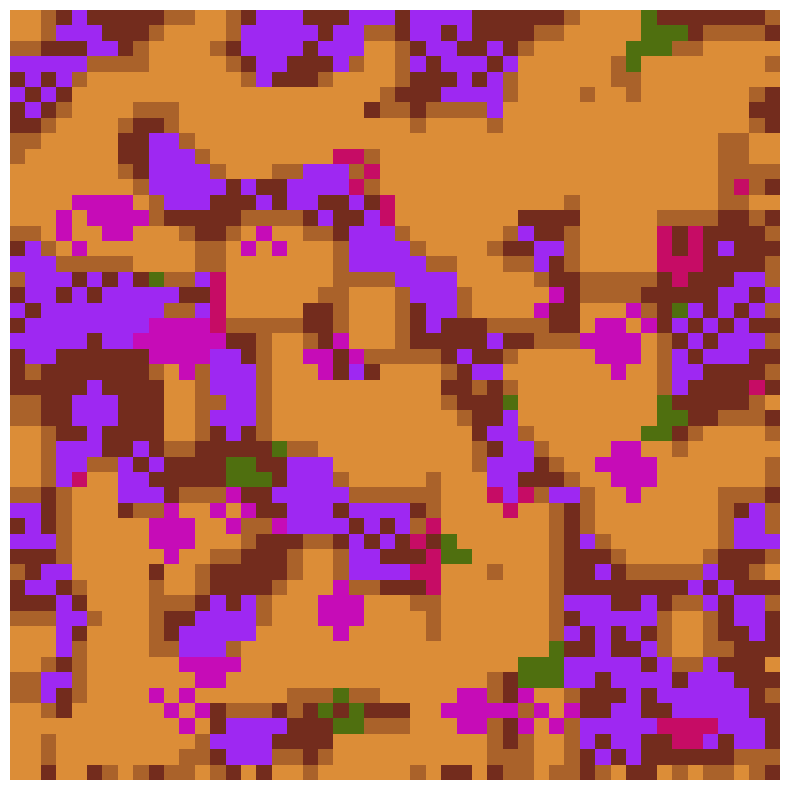

In [15]:
flower_labels = np.random.randint(0, 4, size=(rows, cols))
initial_flowers = np.array([[get_flower(flower_labels[r, c]) for c in range(flower_labels.shape[0])] for r in range(flower_labels.shape[1])])

no_flowers = True
initial = True

with writer.saving(fig, "animation.mp4", dpi=200):
    for _ in range(100):
        global no_flowers, initial_flowers, initial
        ax = plt.subplots(figsize=(10, 10))[1]
        ax.axis('off')
        if no_flowers:
            plot_soil_grid(ax, soil_moisture_grid)
            no_flowers = False
            plant_initial_flowers(soil_moisture_grid, initial_flowers)
        elif initial:
            plot_plant_grid(ax, soil_moisture_grid, initial_flowers)
            initial = False
        else:
            reproduction_cycle(soil_moisture_grid, initial_flowers)
            plot_plant_grid(ax, soil_moisture_grid, initial_flowers)
            aging_cycle(soil_moisture_grid, initial_flowers)
            plot_plant_grid(ax, soil_moisture_grid, initial_flowers)
        writer.grab_frame()
        clear_output(wait=True)

Observations:

1. The plants with the largest lifespan and competition level survive the longest, which intuitively makes sense because they can reproduce for longer and survive against neighboring plants. However, it seems that competition level has more of an affect than lifespan because during one run of the simulation the plant with the lowest lifespan and largest competition level had many more survivng offspring than the plant with the longest lifespan and lowest competition level.
2. Moreover, most plants end up surviving in the moist dark brown soil, while only one plant survives in the dry light brown soil. As a result, by the end of the simulation, we see how the plants are mostly clustered in the very moist soil.

This simulation captures real life well as when we pass grass with dry patches, we don't see any plants on the patches. I think the resulting terrain looks similar to what we see in the real world.